===============================================================================================================================================

# SALMAN HAMKA DE QAIS / BSD 006
# MILESTONE 1

Link Tableau :  [Clik Me] (https://public.tableau.com/views/MILESTONE1-DATACOVID/COVID-19ININDONESIA?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link)

===============================================================================================================================================

``` SQL

SELECT * FROM
covid_19_indonesia_time_series_all

```

# Problem Statement
Indonesia is facing a high death rate due to COVID-19 because of insufficient medical resources and inadequate care capacity. The goal is to reduce the death rate by 20% within 6 months through better allocation of medical resources, increased care capacity, and effective monitoring using data-driven strategies from the COVID-19 dataset in Indonesia on Kaggle.




# IN ORDER TO ACCOMPLISH DATE I WANT TO ANALYZE:
1. Which islands have the highest number of COVID-19 cases?
2. Which province has the highest cases?
3. In what year did a significant decrease in COVID-19 cases occur?
4. Which city has the highest recovery rate after contracting COVID-19?
5. Is there a difference between new cases in DKI Jakarta, Banten, and Riau?
6. Is there a relationship between new cases, new deaths, new recoveries, new active cases, and total cases, total deaths, total recoveries, total active cases by location?






# SMART
Implementing the SMART approach, efforts to reduce the COVID-19 mortality rate in Indonesia by 20% within 6 months will focus on allocating medical resources more effectively, enhancing healthcare capacity, and utilizing data-driven strategies to monitor measurable case rates across each island, with periodic evaluations to ensure achievement of relevant targets tied to the set timeframe.

# A. LOADING DATA


The first step is to perform the import of pandas. Before importing pandas, make sure that the data you want to import is already prepared. You can import pandas by executing the following command:



In [39]:
import pandas as pd #import pandas library
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

This data contains information about COVID-19 in Indonesia. From this data, we can observe the number of deaths, recoveries, active cases, and new cases, among other details. This data was collected from [Clik Me](https://www.kaggle.com/datasets/hendratno/covid19-indonesia)


After importing pandas, the next step is to read or import the prepared file using the following syntax:


In [40]:
# Reading a CSV file from a dataset in the Kaggle directory
df = pd.read_csv("covid_19_indonesia_time_series_all.csv")
pd.set_option('display.max.columns', None)# To display all columns that are not visible
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,203,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,654,Province,NaN,Sumatera Utara,Indonesia,Asia,Sumatera,UTC+07:00,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


penjelasan  : The data above contains 38 columns and 31,822 rows. Next, execute the following command:



# B. DATA CLEANING AND EXPLORATION

- Cluster the provinces using the last date in the dataset with Province as the index of the dataset.


In [41]:
df=pd.read_csv("covid_19_indonesia_time_series_all.csv",parse_dates=["Date"],index_col="Province")
df.columns = df.columns.str.replace(' ','_') #Replacing spaces in column names with underscores (_) in the DataFrame.
df.tail() #To print the last 5 rows of the dataframe

,Date,Location_ISO_Code,Location,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Location_Level,City_or_Regency,Country,Continent,Island,Time_Zone,Special_Status,Total_Regencies,Total_Cities,Total_Districts,Total_Urban_Villages,Total_Rural_Villages,Area_(km2),Population,Population_Density,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Total_Deaths_per_100rb,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Province,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sulawesi Utara,2022-09-15,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,Province,NaN,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
Sumatera Barat,2022-09-15,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,203,Province,NaN,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
Sumatera Selatan,2022-09-15,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,Province,NaN,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
Sumatera Utara,2022-09-15,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,654,Province,NaN,Indonesia,Asia,Sumatera,UTC+07:00,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00
NaN,2022-09-16,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,28460,Country,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


- To display the entire dataframe available

In [42]:
df

,Date,Location_ISO_Code,Location,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Location_Level,City_or_Regency,Country,Continent,Island,Time_Zone,Special_Status,Total_Regencies,Total_Cities,Total_Districts,Total_Urban_Villages,Total_Rural_Villages,Area_(km2),Population,Population_Density,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Total_Deaths_per_100rb,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Province,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,NaN,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
DKI Jakarta,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,NaN,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
NaN,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
Riau,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,0,Province,NaN,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
DKI Jakarta,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,NaN,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sulawesi Utara,2022-09-15,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,Province,NaN,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
Sumatera Barat,2022-09-15,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,203,Province,NaN,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
Sumatera Selatan,2022-09-15,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,Province,NaN,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00


- To see the columns in the table

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31822 entries, DKI Jakarta to nan
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         31822 non-null  datetime64[ns]
 1   Location_ISO_Code            31822 non-null  object        
 2   Location                     31822 non-null  object        
 3   New_Cases                    31822 non-null  int64         
 4   New_Deaths                   31822 non-null  int64         
 5   New_Recovered                31822 non-null  int64         
 6   New_Active_Cases             31822 non-null  int64         
 7   Total_Cases                  31822 non-null  int64         
 8   Total_Deaths                 31822 non-null  int64         
 9   Total_Recovered              31822 non-null  int64         
 10  Total_Active_Cases           31822 non-null  int64         
 11  Location_Level               31822 non

- The next step is to change the data type from Object to Datetime by executing the following command.

In [44]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

# Changing the data type of Date from Object to Datetime

<class 'pandas.core.frame.DataFrame'>
Index: 31822 entries, DKI Jakarta to nan
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         31822 non-null  datetime64[ns]
 1   Location_ISO_Code            31822 non-null  object        
 2   Location                     31822 non-null  object        
 3   New_Cases                    31822 non-null  int64         
 4   New_Deaths                   31822 non-null  int64         
 5   New_Recovered                31822 non-null  int64         
 6   New_Active_Cases             31822 non-null  int64         
 7   Total_Cases                  31822 non-null  int64         
 8   Total_Deaths                 31822 non-null  int64         
 9   Total_Recovered              31822 non-null  int64         
 10  Total_Active_Cases           31822 non-null  int64         
 11  Location_Level               31822 non

In [45]:
df.isnull().sum()

Date                               0
Location_ISO_Code                  0
Location                           0
New_Cases                          0
New_Deaths                         0
New_Recovered                      0
New_Active_Cases                   0
Total_Cases                        0
Total_Deaths                       0
Total_Recovered                    0
Total_Active_Cases                 0
Location_Level                     0
City_or_Regency                31822
Country                            0
Continent                          0
Island                           929
Time_Zone                        929
Special_Status                 27264
Total_Regencies                    0
Total_Cities                     901
Total_Districts                    0
Total_Urban_Villages             904
Total_Rural_Villages             929
Area_(km2)                         0
Population                         0
Population_Density                 0
Longitude                          0
L

Explanation: in this data there are missing values ​​in the Special_Status, Total_Cities, Total_Urban_Villages, Total_Rural_Villages, Growth_Factor_of_New_Cases, Growth_Factor_of_New_Deaths columns.

In [46]:
df.head()

,Date,Location_ISO_Code,Location,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Location_Level,City_or_Regency,Country,Continent,Island,Time_Zone,Special_Status,Total_Regencies,Total_Cities,Total_Districts,Total_Urban_Villages,Total_Rural_Villages,Area_(km2),Population,Population_Density,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Total_Deaths_per_100rb,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Province,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,NaN,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
DKI Jakarta,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,NaN,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
NaN,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
Riau,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,0,Province,NaN,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
DKI Jakarta,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,NaN,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


- To view the data of the location names in the dataset

In [47]:
#to display the value from the Location Column
df.Location

Province
DKI Jakarta              DKI Jakarta
DKI Jakarta              DKI Jakarta
NaN                        Indonesia
Riau                            Riau
DKI Jakarta              DKI Jakarta
                          ...       
Sulawesi Utara        Sulawesi Utara
Sumatera Barat        Sumatera Barat
Sumatera Selatan    Sumatera Selatan
Sumatera Utara        Sumatera Utara
NaN                        Indonesia
Name: Location, Length: 31822, dtype: object

- The next step is to execute a command to delete 'INDONESIA' from that column.

In [48]:
df = df[df['Location'] != 'Indonesia'].reset_index()
# Remove rows where the 'Location' column has the value 'Indonesia'


- Once you've executed that command, the next step is to ensure that the name 'INDONESIA' has been deleted. You can run the following syntax.

In [49]:
df.Location

0              DKI Jakarta
1              DKI Jakarta
2                     Riau
3              DKI Jakarta
4               Jawa Barat
               ...        
30888    Sulawesi Tenggara
30889       Sulawesi Utara
30890       Sumatera Barat
30891     Sumatera Selatan
30892       Sumatera Utara
Name: Location, Length: 30893, dtype: object

#To delete the “City or Regency” column because it has no value.

In [50]:
del df['City_or_Regency']

In [51]:
df

,Province,Date,Location_ISO_Code,Location,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Location_Level,Country,Continent,Island,Time_Zone,Special_Status,Total_Regencies,Total_Cities,Total_Districts,Total_Urban_Villages,Total_Rural_Villages,Area_(km2),Population,Population_Density,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Total_Deaths_per_100rb,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
0,DKI Jakarta,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,192.31%,NaN,NaN
1,DKI Jakarta,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,182.93%,1.00,1.0
2,Riau,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,0,Province,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.16,0.00,0.00,0.00,0.00%,100.00%,NaN,NaN
3,DKI Jakarta,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,174.42%,1.00,1.0
4,Jawa Barat,2020-03-03,ID-JB,Jawa Barat,1,1,0,0,1,1,60,-60,Province,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,6000.00%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30888,Sulawesi Tenggara,2022-09-15,ID-SG,Sulawesi Tenggara,2,0,0,2,25693,569,25090,34,Province,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,15,2.0,219,377.0,1911.0,38068,2635461,69.23,122.070311,-4.124689,0.76,9748.96,0.00,215.90,21.59,2.21%,97.65%,NaN,1.0
30889,Sulawesi Utara,2022-09-15,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,Province,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,14.01,19974.38,0.00,459.14,45.91,2.30%,96.64%,2.85,1.0
30890,Sumatera Barat,2022-09-15,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,203,Province,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,2.36,18959.11,0.00,429.59,42.96,2.27%,97.54%,6.50,1.0
30891,Sumatera Selatan,2022-09-15,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,Province,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,1.95,10002.74,0.00,410.83,41.08,4.11%,95.51%,3.20,1.0


- #To import the cleaned data into a CSV file.

In [52]:
df.to_csv('DataCovidCleaning.csv', index=False)

In [53]:
df.Island

0            Jawa
1            Jawa
2        Sumatera
3            Jawa
4            Jawa
           ...   
30888    Sulawesi
30889    Sulawesi
30890    Sumatera
30891    Sumatera
30892    Sumatera
Name: Island, Length: 30893, dtype: object

- 1. To execute the command to determine which island has the highest number of COVID cases.


<Axes: ylabel='Island'>

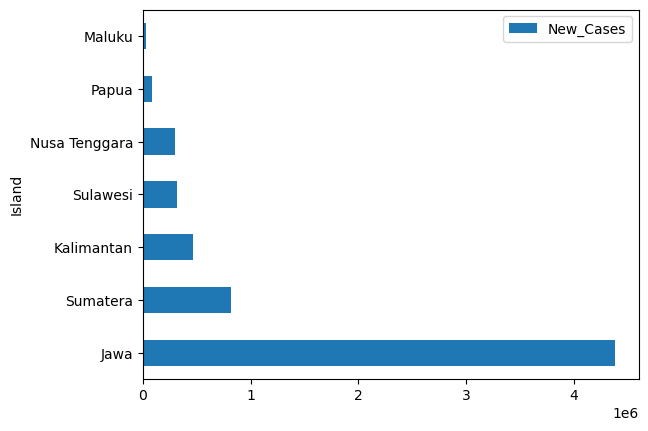

In [54]:
DataIsland = df.groupby('Island')['New_Cases'].sum() #To group by Island and sum the total cases.
DataIsland = pd.DataFrame(DataIsland) #To convert the data for island into a dataframe.
DataIsland = DataIsland.sort_values(by=['New_Cases'], ascending=False)    # To sort the existing data using sort_values
DataIsland.plot(kind='barh')

- Explanation: In the data above, it can be seen that Java Island has the highest total number of cases compared to other islands.

In [55]:
DataIsland

,New_Cases
Island,
Jawa,4382330
Sumatera,822718
Kalimantan,465732
Sulawesi,313608
Nusa Tenggara,297493
Papua,82097
Maluku,33331


- Explanation: In the data above, it can be seen that Java Island has the highest total number of cases compared to other islands.

In [56]:
df

,Province,Date,Location_ISO_Code,Location,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Location_Level,Country,Continent,Island,Time_Zone,Special_Status,Total_Regencies,Total_Cities,Total_Districts,Total_Urban_Villages,Total_Rural_Villages,Area_(km2),Population,Population_Density,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Total_Deaths_per_100rb,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
0,DKI Jakarta,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,192.31%,NaN,NaN
1,DKI Jakarta,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,182.93%,1.00,1.0
2,Riau,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,0,Province,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.16,0.00,0.00,0.00,0.00%,100.00%,NaN,NaN
3,DKI Jakarta,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,174.42%,1.00,1.0
4,Jawa Barat,2020-03-03,ID-JB,Jawa Barat,1,1,0,0,1,1,60,-60,Province,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,6000.00%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30888,Sulawesi Tenggara,2022-09-15,ID-SG,Sulawesi Tenggara,2,0,0,2,25693,569,25090,34,Province,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,15,2.0,219,377.0,1911.0,38068,2635461,69.23,122.070311,-4.124689,0.76,9748.96,0.00,215.90,21.59,2.21%,97.65%,NaN,1.0
30889,Sulawesi Utara,2022-09-15,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,Province,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,14.01,19974.38,0.00,459.14,45.91,2.30%,96.64%,2.85,1.0
30890,Sumatera Barat,2022-09-15,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,203,Province,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,2.36,18959.11,0.00,429.59,42.96,2.27%,97.54%,6.50,1.0
30891,Sumatera Selatan,2022-09-15,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,Province,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,1.95,10002.74,0.00,410.83,41.08,4.11%,95.51%,3.20,1.0


- 2. Which province has the highest number of cases?

In [57]:
df_top_5 = df.groupby('Province').agg({'New_Cases':'sum'}).head(5).reset_index() #untuk menampilkan 5 province dengan total kasus terbanyak
df_top_5 = df_top_5.sort_values(by=['New_Cases'], ascending=False)
df_top_5


,Province,New_Cases
4,DKI Jakarta,1412474
2,Banten,333875
1,Bali,166831
0,Aceh,44038
3,Bengkulu,29173


- Visualizing with a pie chart

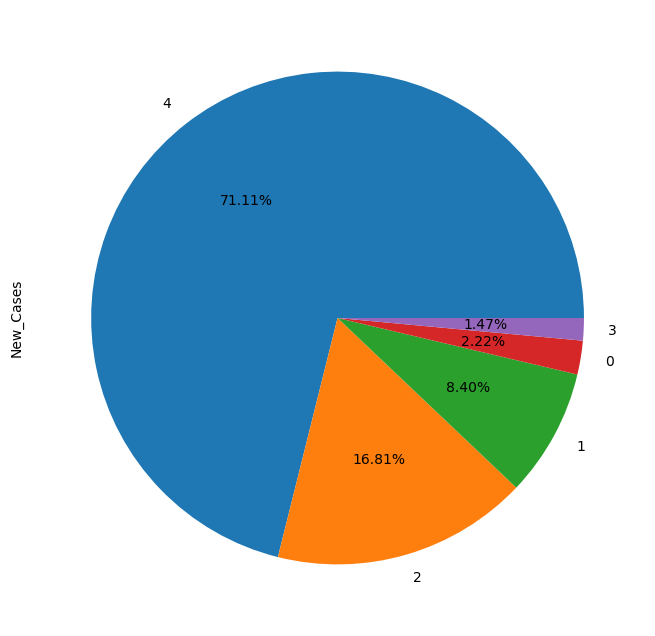

In [58]:
df_top_5
fig,ax1 = plt.subplots(figsize=(8,8))
df_top_5['New_Cases'].plot(kind='pie', autopct='%.2f%%',ax=ax1) 
plt.show()

Explanation of the diagram: It can be seen that the TOP 5 Provinces above show that DKI Jakarta, highlighted in blue, has the highest total number of cases, while the second highest is the Banten region, shown in orange. The province with the lowest number of cases is Bengkulu.


- 3. In which year did the COVID cases occur with the lowest number of cases?

In [59]:
covid = df #Creating COVID as a dataframe


In [60]:
covid = covid.groupby(df['Date'].dt.year)['Total_Cases'].sum()  #To group the years by total cases.
covid=pd.DataFrame(covid)
covid

,Total_Cases
Date,
2020,61382304
2021,988526315
2022,1484624938


- The next step is to visualize it with a 'Line' graph.

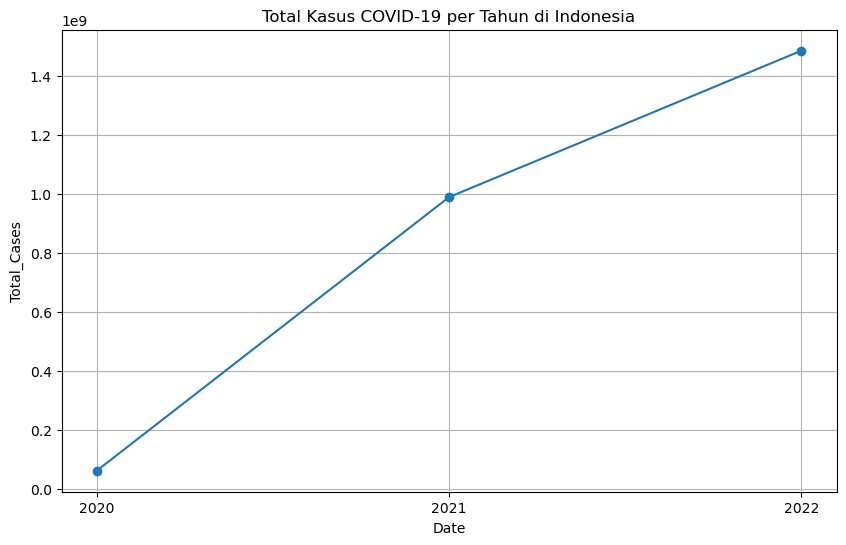

In [61]:
# Creating a line graph for the total cases per year.
plt.figure(figsize=(10, 6))
plt.plot(covid.index, covid['Total_Cases'], marker='o', linestyle='-')
# Adding title and axis labels.
plt.title('Total Kasus COVID-19 per Tahun di Indonesia')
plt.xlabel('Date')
plt.ylabel('Total_Cases')
plt.grid(True)
plt.xticks(covid.index)

# Displaying the graph.
plt.show()

Explanation of the diagram above: From the data above, it can be seen that from 2020 to 2021 until 2022, there was a significant increase in the number of cases. The reason for the low number of cases in 2020 is that it was the first year COVID-19 was discovered in Indonesia.

- 4. Which city has the highest recovery rate after being affected by COVID-19?

<Axes: ylabel='Location'>

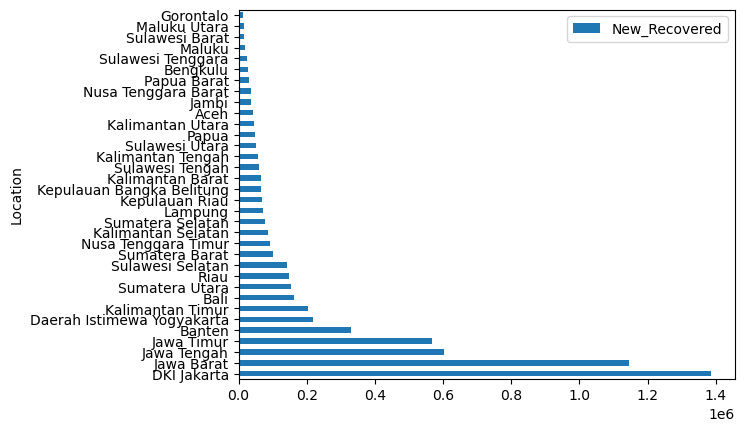

In [62]:
DataLocation = df.groupby('Location')['New_Recovered'].sum() #To group by Island and sum the total cases
DataLocation = pd.DataFrame(DataLocation) #To convert the data for island into a dataframe
DataLocation = DataLocation.sort_values(by=['New_Recovered'], ascending=False) #To sort the existing data using sort_values
DataLocation.plot(kind='barh')

- Explanation: in the graph above it is explained that the highest recovered cases occurred in DKI Jakarta and the lowest recovered cases occurred in Gorontalo

- 5. Does the number of new cases in DKI Jakarta have the same relationship as the number of new cases in Banten?

In [63]:
#The syntax to display the correlation among columns that are numeric.
df.corr(numeric_only=True)

,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Total_Regencies,Total_Cities,Total_Districts,Total_Urban_Villages,Total_Rural_Villages,Area_(km2),Population,Population_Density,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Total_Deaths_per_100rb,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
New_Cases,1.000000,0.515777,0.754382,0.261928,0.394910,0.279880,0.360093,0.842032,0.045859,0.268023,0.165070,0.207888,0.233190,-0.088100,0.313525,0.331775,-0.107545,-0.185433,0.649707,0.206047,0.308054,0.136336,0.136335,-0.008516,0.047267
New_Deaths,0.515777,1.000000,0.522108,-0.088060,0.193705,0.278136,0.166343,0.530583,0.183232,0.247479,0.240737,0.251156,0.272227,-0.055310,0.333357,0.124044,-0.078430,-0.166155,0.269760,0.035785,0.508070,0.076994,0.076994,-0.017680,0.142649
New_Recovered,0.754382,0.522108,1.000000,-0.435547,0.404523,0.282414,0.374058,0.762416,0.038569,0.245355,0.148852,0.189016,0.215167,-0.081358,0.285932,0.308691,-0.099084,-0.170064,0.488556,0.220379,0.324991,0.150137,0.150137,-0.021090,0.083227
New_Active_Cases,0.261928,-0.088060,-0.435547,1.000000,-0.051490,-0.035892,-0.054115,0.031371,-0.000161,0.002888,0.001570,0.001783,0.001710,-0.000978,0.003260,0.003688,-0.001093,-0.001784,0.175079,-0.037828,-0.068195,-0.033453,-0.033454,0.019637,-0.061868
Total_Cases,0.394910,0.193705,0.404523,-0.051490,1.000000,0.761253,0.998755,0.383283,0.091202,0.432872,0.273113,0.344757,0.407058,-0.135769,0.507783,0.530821,-0.170102,-0.293557,0.195620,0.611517,0.054224,0.489211,0.489210,-0.025454,0.004349
Total_Deaths,0.279880,0.278136,0.282414,-0.035892,0.761253,1.000000,0.748937,0.260803,0.345606,0.477330,0.455477,0.479008,0.521631,-0.103757,0.631126,0.250921,-0.145357,-0.315017,0.078215,0.327498,0.056265,0.464466,0.464465,-0.028356,0.006503
Total_Recovered,0.360093,0.166343,0.374058,-0.054115,0.998755,0.748937,1.000000,0.340572,0.077912,0.421389,0.257288,0.331818,0.392003,-0.136335,0.490268,0.533440,-0.168082,-0.285902,0.176590,0.619594,0.038996,0.490629,0.490628,-0.024388,0.001056
Total_Active_Cases,0.842032,0.530583,0.762416,0.031371,0.383283,0.260803,0.340572,1.000000,0.127405,0.290923,0.260120,0.247118,0.266953,-0.037271,0.379507,0.231741,-0.091275,-0.200891,0.489041,0.143668,0.311160,0.091529,0.091528,-0.024601,0.061151
Total_Regencies,0.045859,0.183232,0.038569,-0.000161,0.091202,0.345606,0.077912,0.127405,1.000000,0.477113,0.914343,0.719732,0.900813,0.417472,0.590492,-0.243833,0.080833,-0.196462,-0.170538,-0.299432,-0.085174,-0.195951,-0.195952,-0.001764,0.027535
Total_Cities,0.268023,0.247479,0.245355,0.002888,0.432872,0.477330,0.421389,0.290923,0.477113,1.000000,0.657077,0.770652,0.678059,-0.151649,0.798078,0.214067,-0.424238,-0.081942,-0.011753,-0.032279,-0.015656,-0.014194,-0.014195,-0.017780,0.047080


In [64]:
Jakarta = df['New_Cases'][(df['Location'] == 'DKI Jakarta')]
Banten = df['New_Cases'][(df['Location'] == 'Banten')]
Riau = df['New_Cases'][(df['Location'] == 'Riau')]
print(f"Average new cases in DKI Jakarta : {Jakarta.mean():.2f}") #Calculating the average of new cases that occur in DKI Jakarta.
print(f"Average new cases in Banten : {Banten.mean():.2f}") #Calculating the average of new cases that occur in Banten.
print(f"Average new cases in Riau : {Riau.mean():.2f}") #Calculating the average of new cases that occur in Riau

Average new cases in DKI Jakarta : 1520.42
Average new cases in Banten : 361.34
Average new cases in Riau : 164.49


### Explanation:

- H0: If there is no significant difference in new cases among DKI Jakarta, Banten, and Riau.
- H1: There is a significant difference in new cases among DKI Jakarta, Banten, and Riau.

In [65]:
res = stats.f_oneway(Jakarta, Banten, Riau)
print('p-value: ',res.pvalue)

p-value:  4.521310707578351e-90


Explanation: Since the p-value is less than 0.05, we reject H0. Therefore, there is a significant difference in new cases among DKI Jakarta, Banten, and Riau.

- 6. Is there a relationship between New Cases, New Deaths, New Recovered, New Active Cases, Total Cases, Total Deaths, Total Recovered, Total Active Cases, and Location?

Explanation: The following step is intended to calculate the correlation between columns related to new cases, new deaths, new recoveries, and new active cases, as well as total cases, total deaths, total recoveries, and total active cases using the '.corr()' method.

In [66]:
columns_of_interest = [
    'New_Cases', 'New_Deaths', 'New_Recovered', 'New_Active_Cases',
    'Total_Cases', 'Total_Deaths', 'Total_Recovered', 'Total_Active_Cases'
]

# Calculate the correlation matrix.
correlation_matrix = df[columns_of_interest].corr()
correlation_matrix


,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases
New_Cases,1.000000,0.515777,0.754382,0.261928,0.394910,0.279880,0.360093,0.842032
New_Deaths,0.515777,1.000000,0.522108,-0.088060,0.193705,0.278136,0.166343,0.530583
New_Recovered,0.754382,0.522108,1.000000,-0.435547,0.404523,0.282414,0.374058,0.762416
New_Active_Cases,0.261928,-0.088060,-0.435547,1.000000,-0.051490,-0.035892,-0.054115,0.031371
Total_Cases,0.394910,0.193705,0.404523,-0.051490,1.000000,0.761253,0.998755,0.383283
Total_Deaths,0.279880,0.278136,0.282414,-0.035892,0.761253,1.000000,0.748937,0.260803
Total_Recovered,0.360093,0.166343,0.374058,-0.054115,0.998755,0.748937,1.000000,0.340572
Total_Active_Cases,0.842032,0.530583,0.762416,0.031371,0.383283,0.260803,0.340572,1.000000


The next step is to execute a command to display a heatmap graph that illustrates the correlation between the desired columns with annotations of correlation values in each cell.

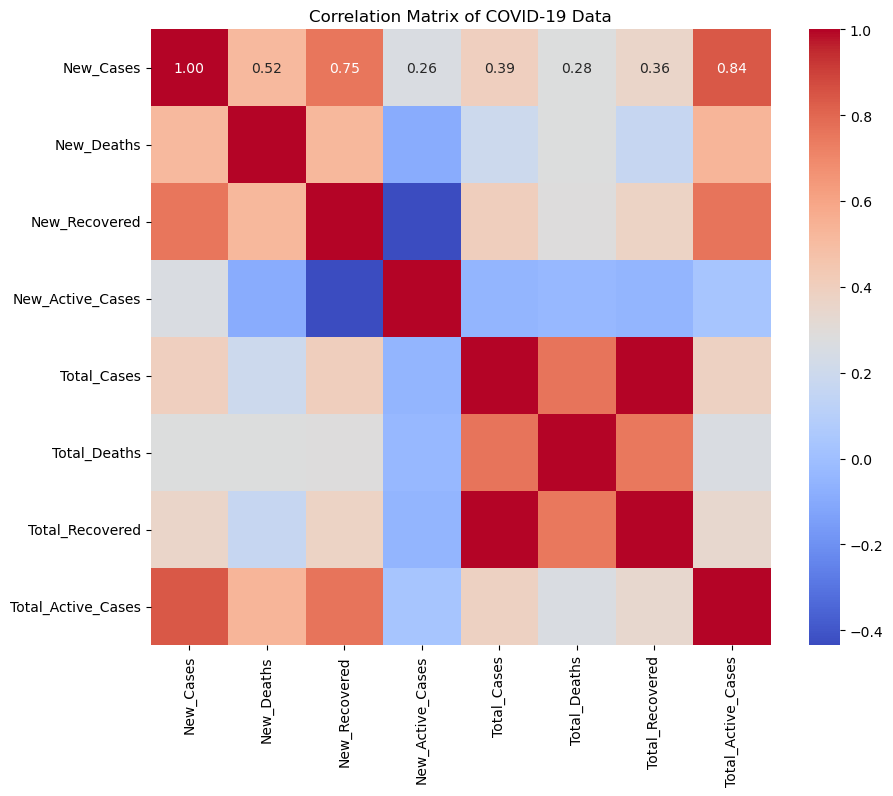

In [67]:
#Create a heatmap from the correlation matrix.
import seaborn as sns
import matplotlib.pyplot as plt

#Create a heatmap from the correlation matrix.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of COVID-19 Data')
plt.show()



# - CONCLUSIONS

- Trend of COVID-19 Cases: The data shows fluctuations in the number of COVID-19 cases over time, with periods of sharp increases followed by decreases or stabilization.

- Regional Distribution: There are differences in the distribution of COVID-19 cases across provinces in Indonesia, influenced by factors such as population density, healthcare accessibility, and implemented control measures.

- Recovery and Mortality: The data also records the number of recoveries and deaths due to COVID-19, providing insights into recovery rates and mortality trends across provinces.

- Regional Disparities: Different regions in Indonesia may face unique challenges related to healthcare infrastructure, economy, and demographics, influencing the pandemic's impact in each region.

- Data Expansion: By expanding the data timeframe and including more attributes, detailed analysis and predictive modeling can provide a deeper understanding of the COVID-19 dynamics in Indonesia.

Considering these conclusions, further steps can be taken to design effective mitigation strategies and understand the long-term impacts of the pandemic on Indonesian society and economy.








